# Определение перспективного тарифа для телеком компании

На основе данных клиентов оператора сотовой связи провести анализ двух тарифных планов: «Смарт» и «Ультра». Рассмотреть поведение клиентов и выбрать перспективный тарифный план.

Описание тарифов:


Тариф «Смарт»
Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»
Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей
Обратите внимание: значения минут и мегабайтов округляется вверх . Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

# Шаг 1. Загрузка данных

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import display
import warnings
warnings.simplefilter("ignore")
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
calls_data_real = pd.read_csv('calls.csv')
calls_data = calls_data_real.copy() #копия датафрейма
calls_data.sample(5)

,id,call_date,duration,user_id
161989,1396_690,2018-05-30,0.00,1396
130041,1332_352,2018-10-29,4.55,1332
172279,1425_891,2018-12-10,6.33,1425
119126,1307_600,2018-07-03,0.00,1307
197691,1483_640,2018-05-27,0.00,1483


In [3]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Таблица calls (информация о звонках):
id — уникальный номер звонка;
call_date — дата звонка;
duration — длительность звонка в минутах;
user_id — идентификатор пользователя, сделавшего звонок.
Пропусков в таблице нет.

In [4]:
internet_data_real = pd.read_csv('internet.csv')
internet_data = internet_data_real.copy() #копия датафрейма
internet_data.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
session_date — дата интернет-сессии
user_id — идентификатор пользователя.
Пропусков в таблице нет.

In [6]:
messages_data_real = pd.read_csv('messages.csv')
messages_data = messages_data_real.copy() #копия датафрейма
messages_data.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Таблица messages (информация о сообщениях):
id — уникальный номер сообщения
message_date — дата сообщения
user_id — идентификатор пользователя, отправившего сообщение.
Пропусков в таблице нет.

In [8]:
tariffs_data_real = pd.read_csv('tariffs.csv')
tariffs_data = tariffs_data_real.copy() #копия датафрейма
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
tariffs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Таблица tariffs (информация о тарифах):
tariff_name — название тарифа;
rub_monthly_fee — ежемесячная абонентская плата в рублях;
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
messages_included — количество сообщений в месяц, включённых в абонентскую плату;
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата);
rub_per_message — стоимость отправки сообщения сверх тарифного пакета;
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта). Пропусков в таблице нет.

In [10]:
users_data_real = pd.read_csv('users.csv')
users_data = users_data_real.copy() #копия датафрейма
users_data.tail()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [11]:
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя;
first_name — имя пользователя;
last_name — фамилия пользователя;
age — возраст пользователя (годы);
reg_date — дата подключения тарифа (день, месяц, год);
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных);
city — город проживания пользователя;
tariff — название тарифного плана.

Пропуски есть в churn_date, но они обоснованы (если значение пропущено, то тариф ещё действовал на момент выгрузки данных), поэтому заменять их не стоит. Практически все пользователи в данных имеют действующий тариф (462).

Проверим данные на наличие пропусков вызовом набора методов для суммирования пропущенных значений.

In [12]:
print(calls_data.isnull().sum())
print(internet_data.isnull().sum())
print(messages_data.isnull().sum())
print(tariffs_data.isnull().sum())
print(users_data.isnull().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
id              0
message_date    0
user_id         0
dtype: int64
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


# Шаг 2. Подготовка данных

## Замена типа данных

Проверим типы данных в каждой из 5ти таблиц.

### Таблица calls (информация о звонках)

In [13]:
calls_data.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

Сейчас значения в столбце call_date (дата звонка) — это строки (тип данных object). Методом to_datetime() заменим содержимое этого столбца в даты.

In [14]:
calls_data['call_date']= pd.to_datetime(calls_data['call_date'], format='%Y-%m-%d')

In [15]:
# Проверка замены типа данных
calls_data.dtypes

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

### Таблица internet (информация об интернет-сессиях)

In [16]:
internet_data.dtypes

Unnamed: 0        int64
id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

Сейчас значения в столбце session_date (дата интернет-сессии) — это строки (тип данных object). Методом to_datetime() заменим содержимое этого столбца в даты.

In [17]:
internet_data['session_date']= pd.to_datetime(internet_data['session_date'], format='%Y-%m-%d')

In [18]:
# Проверка замены типа данных
internet_data.dtypes

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

### Таблица messages (информация о сообщениях)

In [19]:
messages_data.dtypes

id              object
message_date    object
user_id          int64
dtype: object

Сейчас значения в столбце message_date (дата сообщения) — это строки (тип данных object). Методом to_datetime() заменим содержимое этого столбца в даты.

In [20]:
messages_data['message_date']= pd.to_datetime(messages_data['message_date'], format='%Y-%m-%d')

In [21]:
# Проверка замены типа данных 
messages_data.dtypes

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

### Таблица tariffs (информация о тарифах)

In [22]:
tariffs_data.dtypes

messages_included         int64
mb_per_month_included     int64
minutes_included          int64
rub_monthly_fee           int64
rub_per_gb                int64
rub_per_message           int64
rub_per_minute            int64
tariff_name              object
dtype: object

В данной таблице типы данных оставим исходные, так как они корректны.

### Таблица users (информация о пользователях)

In [23]:
users_data.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

Сейчас значения в столбцах churn_date (lата прекращения пользования тарифом) и reg_date (дата подключения тарифа)— это строки. Методом to_datetime() заменим содержимое столбцов в даты.

In [24]:
users_data['churn_date']= pd.to_datetime(users_data['churn_date'], format='%Y-%m-%d')
users_data['reg_date']= pd.to_datetime(users_data['reg_date'], format='%Y-%m-%d')

In [25]:
# Проверка замены типа данных 
users_data.dtypes

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

## Поиск ошибок в данных.

### Таблица calls (информация о звонках)

In [26]:
print(calls_data.call_date.describe())
print(calls_data.duration.describe())

count                  202607
unique                    365
top       2018-12-31 00:00:00
freq                     1435
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object
count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64


В таблице представлены звонки пользователей за весь 2018 год. Встречаются строки с нулевой длиной разговора.

In [27]:
print(calls_data.duration.value_counts())

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64


У большого количества звонков (39613) длительность — 0.00 минут. Это проблема в данных, нужна предобработка.
Значения минут округляется вверх . Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута. Данные представлены без округления до минут, поэтому округлим все значения в большую сторону.
Если в таблице присутствует уникальный номер звонка, то звонок был и минимальная продолжительность времени, которую засчитывает оператор, равна одной минуте, тогда заменим все нули в столбце duration на единицы. 

In [28]:
# Замена нулей на единицы
calls_data['duration'] = calls_data['duration'].replace(0,1)

In [29]:
# Округляем до целых в большую сторону
calls_data['duration'] = np.ceil(calls_data['duration'])

Так как данные округлены до целых чисел, то заменим вещественный тип данных на целочисленный 

In [30]:
calls_data['duration'] = calls_data['duration'].astype('int')

In [31]:
# Проверка замены
print(calls_data.duration.describe())
print(calls_data['duration'].head(3))

count    202607.000000
mean          7.353714
std           5.733230
min           1.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64
0    1
1    1
2    3
Name: duration, dtype: int32


### Таблица internet (информация об интернет-сессиях)

In [32]:
internet_data['session_date'].describe()

count                  149396
unique                    365
top       2018-12-31 00:00:00
freq                     1057
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

In [33]:
internet_data['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

В таблице представлены данные за весь 2018 год. Встречаются сессии с интернет-трафиком 0 мегабайт. Это проблема в данных, нужна предобработка.
Значения мегабайтов округляется вверх. Данные представлены без округления до мегабайта, поэтому округлим все значения в большую сторону.
Если в таблице присутствует уникальный номер сессии, то выход в мнтернет был и значит, можем заменить все нули в столбце mb_used на единицы. 

In [34]:
# Замена нулей на единицы
internet_data['mb_used'] = internet_data['mb_used'].replace(0,1)

In [35]:
# Округляем до целых в большую сторону
internet_data['mb_used'] = np.ceil(internet_data['mb_used'])

Так как данные округлены до целых чисел, то заменим вещественный тип данных на целочисленный 

In [36]:
internet_data['mb_used'] = internet_data['mb_used'].astype('int')

In [37]:
# Проверка замены
print(internet_data['mb_used'].describe())
print(internet_data['mb_used'].head(3))

count    149396.000000
mean        370.753280
std         278.212524
min           1.000000
25%         139.000000
50%         349.000000
75%         560.000000
max        1725.000000
Name: mb_used, dtype: float64
0     113
1    1053
2    1198
Name: mb_used, dtype: int32


### Таблица tariffs (информация о тарифах)

Таблица tariffs_data небольшая, поэтому оценить ее можно визуально. Все данные корректны.

In [38]:
tariffs_data

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Таблица messages (информация о сообщениях)

In [39]:
messages_data['message_date'].describe()

count                  123036
unique                    364
top       2018-12-31 00:00:00
freq                      859
first     2018-01-02 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

Заметим, что в данных нет одного дня за 2018 год - первого января (364 значений из 365).

### Таблица users (информация о пользователях)

In [40]:
users_data['first_name'].unique()

array(['Рафаил', 'Иван', 'Евгений', 'Белла', 'Татьяна', 'Афанасий',
       'Леонид', 'Юна', 'Рустэм', 'Василиса', 'Эдуард', 'Веселина',
       'Варлам', 'Борис', 'Яков', 'Рузана', 'Марица', 'Мария', 'Матвей',
       'Игнатий', 'Тала', 'Святослав', 'Людмила', 'Иулиан', 'Владислав',
       'Рустем', 'Алексей', 'Мариетта', 'Лаврентий', 'Инна', 'Лия',
       'Розалия', 'Анжелика', 'Изольда', 'Агнесса', 'Юрий', 'Михаил',
       'Константин', 'Марианна', 'Иннокентий', 'Джемма', 'Екатерина',
       'Милица', 'Лола', 'Габриель', 'Кристина', 'Павел', 'Ренальд',
       'Луиза', 'Радислав', 'Динара', 'Лукий', 'Глеб', 'Тамара',
       'Александр', 'Таира', 'Роза', 'Исак', 'Юзефа', 'Ким', 'Гордей',
       'Эльза', 'Гектор', 'Андрей', 'Рафаэль', 'Фёдор', 'Харитон',
       'Еремей', 'Всеволод', 'Софья', 'Авксентий', 'Виолетта', 'Ириней',
       'Гелена', 'Ксения', 'Вера', 'Вениамин', 'Вероника', 'Даниэла',
       'Алла', 'Элеонора', 'Аюна', 'Руслан', 'Онисим', 'Марта', 'Эльвира',
       'Габриэль', '

In [41]:
users_data['last_name'].unique()

array(['Верещагин', 'Ежов', 'Абрамович', 'Белякова', 'Авдеенко', 'Горлов',
       'Ермолаев', 'Березина', 'Пономарёв', 'Блинова', 'Кононов',
       'Алёшко', 'Соловьев', 'Андреенко', 'Акинфьев', 'Алюшина',
       'Сазонова', 'Аленникова', 'Золотов', 'Круглов', 'Костина',
       'Тихонов', 'Трофимова', 'Мельникова', 'Антипов', 'Акинин',
       'Бородин', 'Авдеев', 'Евсеев', 'Селезнев', 'Русанова', 'Тимофеев',
       'Игнатьева', 'Бабушкина', 'Бондарев', 'Аракина', 'Андропова',
       'Архипова', 'Денисова', 'Одинцов', 'Кравцов', 'Добрынин',
       'Родионова', 'Рябов', 'Карасева', 'Александрова', 'Меркулова',
       'Мясникова', 'Ларин', 'Аничкина', 'Сомова', 'Панов', 'Фёдоров',
       'Платонова', 'Артемьев', 'Дьячкова', 'Глушков', 'Свиридов',
       'Рудаков', 'Ситникова', 'Коршунов', 'Климова', 'Алфеева',
       'Игнатова', 'Малахов', 'Абашкина', 'Демьянов', 'Кочетов',
       'Селиванова', 'Чумаков', 'Андрейкин', 'Павловский', 'Никулин',
       'Шарапов', 'Кольцова', 'Литвинов', 'Авр

Данные о фамилиях и именах на первый взгляд корректны.

In [42]:
print(users_data['age'].describe())
print(users_data['age'].unique())

count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64
[52 41 59 23 68 67 21 65 63 24 26 44 38 36 64 58 73 71 61 72 42 56 32 62
 20 51 28 66 31 37 47 40 69 48 33 39 43 46 45 55 53 34 49 25 18 70 50 19
 54 60 29 27 74 22 30 75 57 35]


Данные о возрасте корректны: нет нелогичных значений.

In [43]:
users_data['reg_date'].describe()

count                     500
unique                    270
top       2018-05-28 00:00:00
freq                        8
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

К тарифным планам стали подключать с 1 января 2018 года.

In [44]:
users_data['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Данные о городах записаны корректно, нет дубликатов по столбцу.

In [45]:
users_data['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

Все данные в таблице представлены для двух тарифных планов, которые исследуем ('ultra' и 'smart').

## Обработка дубликатов

Необходимо установить наличие дубликатов. 

In [46]:
calls_data.duplicated().sum()

0

In [47]:
internet_data.duplicated().sum()

0

In [48]:
messages_data.duplicated().sum()

0

In [49]:
tariffs_data.duplicated().sum()

0

In [50]:
users_data.duplicated().sum()

0

Дубликатов в исследуемых таблицах нет.

## Посчитаем для каждого пользователя:

### количество сделанных звонков и израсходованных минут разговора по месяцам

Прежде чем сгруппировать данные по месяцам, добавим в таблицу calls_data колонку, возвращающую Месяц из столбца call_date (дата звонка).

In [51]:
calls_data['month'] = calls_data['call_date'].dt.month
calls_data[['call_date','month']].head()

,call_date,month
0,2018-07-25,7
1,2018-08-17,8
2,2018-06-11,6
3,2018-09-21,9
4,2018-12-15,12


Подсчитаем для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам в отдельной таблице calls_data_month.

In [52]:
calls_data_month = (calls_data
                    .pivot_table(index=['user_id','month'], values=['id','duration'],aggfunc={'id':'count','duration':'sum'})
                    .rename(columns={'id':'count_calls','duration':'sum_minute'})
                   )
# группируем данные по каждому клиенту и по месяцам
# подсчитываем кол-во звонков методом count() и количество минут разговора методом sum()
#переименовываем столбцы
calls_data_month.head(5)

sum_minute  count_calls
user_id month                         
1000    5             164           22
        6             187           43
        7             346           47
        8             418           52
        9             478           58

### количество отправленных сообщений по месяцам

Прежде чем сгруппировать данные по месяцам, добавим в таблицу messages_data колонку, возвращающую Месяц из столбца messages_date (дата сообщения).

In [53]:
messages_data['month'] = messages_data['message_date'].dt.month
messages_data[['message_date','month']].sample(5)

,message_date,month
115900,2018-03-27,3
26359,2018-10-27,10
23299,2018-07-05,7
42667,2018-09-22,9
48306,2018-09-24,9


Подсчитаем для каждого пользователя количество отправленных сообщений по месяцам.

In [54]:
messages_data_month = (messages_data
                    .pivot_table(index=['user_id','month'], values='message_date',aggfunc='count')
                    .rename(columns={'message_date':'count_message'})
                   )
# группируем данные по каждому клиенту и по месяцам
# подсчитываем кол-во сообщений методом count()
#переименовываем столбец
messages_data_month.head(5)

count_message
user_id month               
1000    5                 22
        6                 60
        7                 75
        8                 81
        9                 57

### объем израсходованного интернет-трафика по месяцам

Прежде чем сгруппировать данные по месяцам, добавим в таблицу internet_data колонку, возвращающую Месяц из столбца session_date (дата интернет-сессии).

In [55]:
internet_data['month'] = internet_data['session_date'].dt.month
internet_data[['session_date','month']].sample(5)

,session_date,month
84332,2018-12-06,12
41311,2018-04-15,4
18886,2018-03-26,3
69916,2018-11-22,11
569,2018-11-10,11


Подсчитаем для каждого пользователя объем израсходованного интернет-трафика по месяцам.

In [56]:
internet_data_month = (internet_data
                    .pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')
                    .rename(columns={'mb_used':'sum_mb'})
                   )
# группируем данные по каждому клиенту и по месяцам
# подсчитываем объем израсходованного интернет-трафика методом sum()
#переименовываем столбец
internet_data_month.head(5)

sum_mb
user_id month        
1000    5        2257
        6       23262
        7       14017
        8       14072
        9       14583

### помесячную выручку с каждого пользователя

Прежде чем подсчитать общую выручку необходимо свести данные в одну таблицу.

Для слияния таблиц users_data  и tariffs_data используем метод merge().

In [57]:
# Переименуем столбец tariff в таблице users_data как в таблице tariffs_data (=tariff_name).
users_data = users_data.rename(columns={'tariff':'tariff_name'})
users_data.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [58]:
# Объединение двух таблиц по стобцу tariff_name
user_tariff = users_data.merge(tariffs_data,on='tariff_name')
user_tariff.sample(3).T

,29,181,117
user_id,1099,1043,1392
age,67,69,54
churn_date,NaT,NaT,2018-09-27 00:00:00
city,Тольятти,Ставрополь,Челябинск
first_name,Аюна,Марианна,Алла
last_name,Сергеева,Родионова,Беликова
reg_date,2018-03-16 00:00:00,2018-07-08 00:00:00,2018-02-27 00:00:00
tariff_name,ultra,smart,ultra
messages_included,1000,50,1000
mb_per_month_included,30720,15360,30720


In [59]:
# Данные о таблице
print(user_tariff.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                500 non-null    int64         
 1   age                    500 non-null    int64         
 2   churn_date             38 non-null     datetime64[ns]
 3   city                   500 non-null    object        
 4   first_name             500 non-null    object        
 5   last_name              500 non-null    object        
 6   reg_date               500 non-null    datetime64[ns]
 7   tariff_name            500 non-null    object        
 8   messages_included      500 non-null    int64         
 9   mb_per_month_included  500 non-null    int64         
 10  minutes_included       500 non-null    int64         
 11  rub_monthly_fee        500 non-null    int64         
 12  rub_per_gb             500 non-null    int64         
 13  rub_p

Данные объединились. Получилось 15 столбцов (8столбцов+7столбцов), 500 строк (общее количество пользователей). В одной таблице собрали данные о пользователе и подробное описание его тарифа.

Теперь объединим три сводные таблицы internet_data_month, calls_data_month, messages_data_month по двум столбцам index=['user_id','month'].

In [60]:
month_data = calls_data_month.merge(messages_data_month,on=['user_id','month'],how='outer')
month_data = month_data.merge(internet_data_month, on=['user_id','month'],how='outer')
month_data.head()

sum_minute  count_calls  count_message   sum_mb
user_id month                                                 
1000    5           164.0         22.0           22.0   2257.0
        6           187.0         43.0           60.0  23262.0
        7           346.0         47.0           75.0  14017.0
        8           418.0         52.0           81.0  14072.0
        9           478.0         58.0           57.0  14583.0

In [61]:
month_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1476, 4)
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sum_minute     3174 non-null   float64
 1   count_calls    3174 non-null   float64
 2   count_message  2717 non-null   float64
 3   sum_mb         3203 non-null   float64
dtypes: float64(4)
memory usage: 114.0 KB


Подготовим таблицу для дальнейшего объединения с таблицей user_tariff по индексу user_id, так чтобы появился столбец с наименованием месяца.

In [62]:
# замена пропусков нулями, чтобы помесячная выручка считалась корректно (без NaN)
month_data = month_data.fillna(0)

In [63]:
# проверка отсутствия пропусков
month_data.isnull().sum()

sum_minute       0
count_calls      0
count_message    0
sum_mb           0
dtype: int64

In [64]:
# сбросим индекс в таблице с мультииндексом и установим индекс из одного столбца user_id: 
month_data_id = month_data.reset_index().set_index('user_id')
month_data_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 1000 to 1476
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          3214 non-null   int64  
 1   sum_minute     3214 non-null   float64
 2   count_calls    3214 non-null   float64
 3   count_message  3214 non-null   float64
 4   sum_mb         3214 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 150.7 KB


In [65]:
# смотрим новый индекс
month_data_id.index.to_frame()[[]].reset_index().head()

,user_id
0,1000
1,1000
2,1000
3,1000
4,1000


Объединение таблиц user_tariff (пользователи и их тарифы) и month_data по индексу 'user_id'. Параметру how передадим значение left, чтобы не появилось строк с пропусками в данных о использованных минутах разговора/сообщениях/интернет-трафике.

In [66]:
finall_data = month_data_id.merge(user_tariff,on='user_id',how='left')
finall_data.head(3).T

,0,1,2
user_id,1000,1000,1000
month,5,6,7
sum_minute,164,187,346
count_calls,22,43,47
count_message,22,60,75
sum_mb,2257,23262,14017
age,52,52,52
churn_date,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар
first_name,Рафаил,Рафаил,Рафаил


In [67]:
# Проверка пропусков
finall_data.isnull().sum()

user_id                     0
month                       0
sum_minute                  0
count_calls                 0
count_message               0
sum_mb                      0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Подсчитаем помесячную выручку с каждого пользователя (вычтим бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану). Для этого создадим новый столбец income с помесячной выручкой.

Если суммарное количество звонков/сообщений/интернет-трафика меньше чем бесплатный лимит, то разность не нужно умножать на значение из тарифного плана, значение разности нужно принять за 0.

In [68]:
# Создадим столбцы разностей
finall_data['over_minute'] = finall_data['sum_minute'] - finall_data['minutes_included']
finall_data['over_message'] = finall_data['count_message'] - finall_data['messages_included']
finall_data['over_mb'] = finall_data['sum_mb'] - finall_data['mb_per_month_included']

# Обнулим значения в строках, где количество звонков/сообщений/интернет-трафика меньше чем бесплатный лимит
finall_data.loc[(finall_data['over_minute']<0),'over_minute'] = 0 
finall_data.loc[(finall_data['over_message']<0),'over_message'] = 0
finall_data.loc[(finall_data['over_mb']<0),'over_mb'] = 0

# Подсчитаем помесячную выручку с каждого пользователя 
# Округляем минуты и мегабайты до целых в большую сторону

finall_data['income'] = ( np.ceil(finall_data['over_minute'])*finall_data['rub_per_minute'] 
                         + finall_data['over_message']*finall_data['rub_per_message'] 
                         + np.ceil(finall_data['over_mb']/1024)*finall_data['rub_per_gb']
                         + finall_data['rub_monthly_fee']
                        )

finall_data.head(3).T

,0,1,2
user_id,1000,1000,1000
month,5,6,7
sum_minute,164,187,346
count_calls,22,43,47
count_message,22,60,75
sum_mb,2257,23262,14017
age,52,52,52
churn_date,NaT,NaT,NaT
city,Краснодар,Краснодар,Краснодар
first_name,Рафаил,Рафаил,Рафаил


Финальная таблица данных finall_data готова. Помесячная выручка с каждого пользователя рассчитана в отдельном столбце income.

# Шаг 3. Анализ данных

## Опишем поведение клиентов оператора

Создадим отдельные таблицы по тарифам.

In [69]:
finall_data_ultra = finall_data.query('tariff_name=="ultra"')
finall_data_smart = finall_data.query('tariff_name=="smart"')

Исследуем параметры двух тарифов.

Чтобы понять, в какую сторону скошен датасет рассмотрим характеристики положения: медиану и среднее.
Помня о том, что медиана в отличие от среднего устойчива к выбросам: для скошенных вправо данных медиана будет меньше среднего, а для скошенных влево — больше.

Определим границы, за которыми начинаются выбросы.

Так как известно, что наши данные это не вся совокупность, а выборка из неё, вместо дисперсии считаем её оценку по имеющейся выборке. Для этого в методе var() указываем параметр ddof=1. 


In [70]:
# Создадим функцию для расчета числовых показателей вуыскшиу(), дисперсию и определяющую скошенность данных

def describe_data(df,column):
    iqr = df[column].describe().loc['75%'] - df[column].describe().loc['25%']
    iqr_lower = df[column].describe().loc['25%'] - iqr*1.5
    iqr_upper = df[column].describe().loc['75%'] + iqr*1.5
   
    #plt.ylim(0,iqr_upper*2)
    #df[column].boxplot() # отображение ящика с усами
    #plt.show()
    
    print('Среднее значение',column,'= {:.1f}'.format(df[column].describe().loc['mean']))
    print('Медиана',column,'= {:.1f}'.format(df[column].describe().loc['50%']))
    if df[column].describe().loc['mean'] > df[column].describe().loc['50%']:
        print('Данные скошены вправо')
    else:
        print('Данные скошены влево')
    print('Выбросы лежат в границах ниже {:.1f}'.format(iqr_lower),'и выше {:.1f}'.format(iqr_upper))
    print('Стандартное отклонение',column,'= {:.1f}'.format(df[column].describe().loc['std']))
    print('Стандартное отклонение для выборки',column,'= {:.1f}'.format(np.std(df[column])))
    print('Дисперсия',column,'= {:.1f}'.format(np.var(df[column])))
    print()

    
for column in ('sum_mb','count_message','sum_minute'):
    describe_data(finall_data_smart,column)    

Среднее значение sum_mb = 16237.2
Медиана sum_mb = 16540.0
Данные скошены влево
Выбросы лежат в границах ниже 1538.0 и выше 31202.0
Стандартное отклонение sum_mb = 5879.8
Стандартное отклонение для выборки sum_mb = 5878.5
Дисперсия sum_mb = 34556481.0

Среднее значение count_message = 33.4
Медиана count_message = 28.0
Данные скошены вправо
Выбросы лежат в границах ниже -51.5 и выше 112.5
Стандартное отклонение count_message = 28.2
Стандартное отклонение для выборки count_message = 28.2
Дисперсия count_message = 796.5

Среднее значение sum_minute = 429.5
Медиана sum_minute = 435.0
Данные скошены влево
Выбросы лежат в границах ниже -112.5 и выше 963.5
Стандартное отклонение sum_minute = 194.9
Стандартное отклонение для выборки sum_minute = 194.8
Дисперсия sum_minute = 37957.7



**Вывод по тарифу Smart:**

В среднем пользователи тарифа ежемесячно тратят 16237.2 мегабайт интернет-трафика, с разбросом данных 5878.5 мегабайт.Редкие и выбивающиеся значения находятся в границах ниже 1538 и выше 31202. Дисперсия равна 34556481.

В среднем пользователи тарифа ежемесячно отправляют 33 сообщения, с разбросом данных в 28 сообщений.Редкие и выбивающиеся значения находятся в границах выше 112.5. Дисперсия равна 796.5.

В среднем пользователи тарифа ежемесячно разговаривают по 430 минут, с разбросом данных 195 минут.Редкие и выбивающиеся значения находятся в границах выше 963.5. Дисперсия равна 37957.7.

Т.к. использовынные минуты разговора, сообщения и объём интернет-трафика число неотрицательное, то рассматриваемые границы выбросов лежат выше нулевого значения.

In [71]:
for column in ('sum_mb','count_message','sum_minute'):
    describe_data(finall_data_ultra,column)

Среднее значение sum_mb = 19488.7
Медиана sum_mb = 19324.0
Данные скошены вправо
Выбросы лежат в границах ниже -10831.5 и выше 49484.5
Стандартное отклонение sum_mb = 10097.1
Стандартное отклонение для выборки sum_mb = 10092.0
Дисперсия sum_mb = 101848076.5

Среднее значение count_message = 49.4
Медиана count_message = 38.0
Данные скошены вправо
Выбросы лежат в границах ниже -103.5 и выше 188.5
Стандартное отклонение count_message = 47.8
Стандартное отклонение для выборки count_message = 47.8
Дисперсия count_message = 2282.9

Среднее значение sum_minute = 540.8
Медиана sum_minute = 532.0
Данные скошены вправо
Выбросы лежат в границах ниже -429.5 и выше 1494.5
Стандартное отклонение sum_minute = 325.7
Стандартное отклонение для выборки sum_minute = 325.6
Дисперсия sum_minute = 105998.0



**Вывод по тарифу Ultra:**

В среднем пользователи тарифа ежемесячно тратят 19489 мегабайт интернет-трафика, с разбросом данных 10092 мегабайт.Редкие и выбивающиеся значения находятся в границах выше 49484.5. Дисперсия равна 101848076.5.

В среднем пользователи тарифа ежемесячно отправляют 49 сообщения, с разбросом данных в 48 сообщений.Редкие и выбивающиеся значения находятся в границах выше 188.5. Дисперсия равна 2282.9.

В среднем пользователи тарифа ежемесячно разговаривают по 541 минут, с разбросом данных 326 минут.Редкие и выбивающиеся значения находятся в границах выше 1494.5. Дисперсия равна 105998.

Т.к. использовынные минуты разговора, сообщения и объём интернет-трафика число неотрицательное, то рассматриваемые границы выбросов лежат выше нулевого значения.

**Построим графики (ящики с усами) по двум тарифам.**

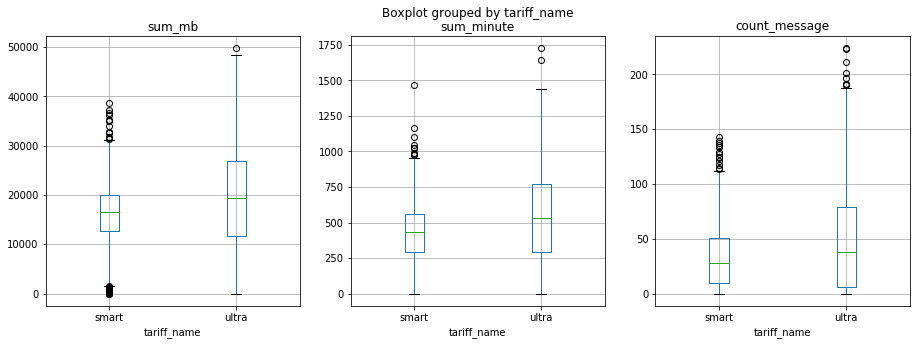

In [72]:
plt.subplots(figsize=(15,5)) # создание таблицы для отрисовки графиков вместе
finall_data.boxplot('sum_mb',by='tariff_name',ax=plt.subplot(1,3,1)) # 1-я ячейка
finall_data.boxplot('sum_minute',by='tariff_name',ax=plt.subplot(1,3,2)) # 2-я ячейка
finall_data.boxplot('count_message',by='tariff_name',ax=plt.subplot(1,3,3)) # 3-я ячейка
plt.show()

Вывод по минутам разговора: медианная продолжительность разговора у тарифа Ultra больше, причем и сам датасет скошен вправо. Т.е. пользователи данного тарифа разговаривают ощутимо больше медианного значения.

Вывод по количеству сообщений: медианное количество сообщений у тарифа Ultra больше, причем и сам датасет скошен вправо. Т.е. пользователи данного тарифа пишут сообщений ощутимо больше медианного значения.

Вывод по объёму интернет-трафика: медианный объем интернет-трафика у тарифа Ultra больше, причем и сам датасет скошен вправо. Т.е. пользователи данного тарифа подьзуются интернетом ощутимо больше медианного значения.

Сравним наглядно сколько минут разговора требуется пользователям каждого тарифа в месяц. Строим гистограммы.

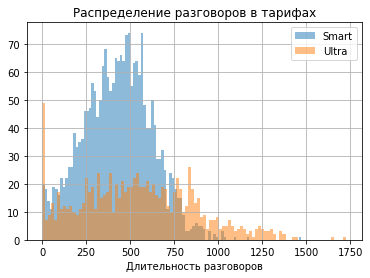

In [73]:
finall_data_smart['sum_minute'].hist(bins=100,alpha=0.5, label='Smart') 
finall_data_ultra['sum_minute'].hist(bins=100,alpha=0.5, label='Ultra')
plt.legend()  
plt.xlabel('Длительность разговоров')
plt.title('Распределение разговоров в тарифах')
plt.show()

Как видно из графика, пользователи тарифа Ultra разговаривают дольше, но само количество разговоров/звонков в тарифе Smart заметно больше.

Сравним наглядно сколько сколько сообщений требуется пользователям каждого тарифа в месяц. Строим гистограммы.

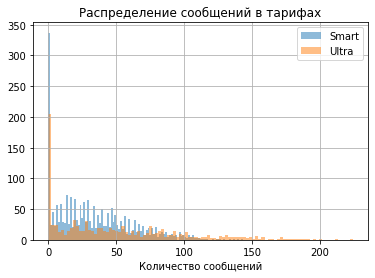

In [74]:
finall_data_smart['count_message'].hist(bins=100,alpha=0.5, label='Smart')
finall_data_ultra['count_message'].hist(bins=100,alpha=0.5, label='Ultra')
plt.legend()  
plt.xlabel('Количество сообщений')
plt.title('Распределение сообщений в тарифах')
plt.show()

Как видно из графика, пользователи тарифа Ultra отправляют больше сообщений, хотя разница незначительна.

Сравним какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Посторим гистограммы.

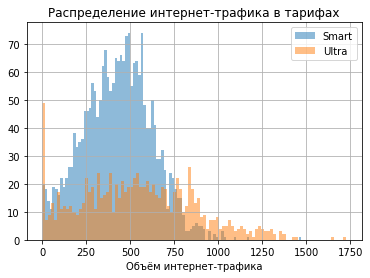

In [75]:
finall_data_smart['sum_minute'].hist(bins=100,alpha=0.5, label='Smart')
finall_data_ultra['sum_minute'].hist(bins=100,alpha=0.5, label='Ultra')
plt.legend()  
plt.xlabel('Объём интернет-трафика')
plt.title('Распределение интернет-трафика в тарифах')
plt.show()

Как видно из графика, пользователи тарифа Ultra тратят больше мегабайтов интернет-трафика за месяц, хотя количество абонентов тарифа Smart, использующих интернет, тоже достаточно велико.

Итак,проделан предварительный анализ тарифов Ultra и Smart на небольшой выборке за 2018 год клиентов 500 пользователей. Рассмотрели Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц. Анализ показал, что пользователи тарифа Ultra разговаривают дольше, чаще отправляют сообщения и чаще пользуются интернетом. Однако пока не ясно, какой тариф приносит больше денег компании.


# Шаг 4. Проверка гипотез

## Гипотеза: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;

Рассмотрим общие данные о средней выручки пользователей по тарифам. 

In [76]:
#Числовое описание данных для столбца income тарифа smart
print(finall_data_smart['income'].describe())

count    2229.000000
mean     1312.512337
std       830.938122
min       550.000000
25%       553.000000
50%      1075.000000
75%      1757.000000
max      6824.000000
Name: income, dtype: float64


In [77]:
#Числовое описание данных для столбца income тарифа ultra
print(finall_data_ultra['income'].describe())

count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64


Заметим, что средние (1312.5 и 2071) и медианы (1075 и 1950) тарифов отличаются. Чтобы понять, различаются ли средние значения выручки пользователей разных тарифов, недостаточно просто сравнить числа за определённый период времени. Без проведения корректного теста нельзя считать отличия случайными или разницу достаточной, чтобы полагать суммы разными.
Вместо расчёта и сравнения самих средних, используются сами датасеты для проведения статистического теста.

Нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства. Если выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такая: «нет, разницы нет, то есть исследуемые параметры равны».
Cформулируем нулевую гипотезу H₀: средние выручки пользователей тарифов «Ультра» и «Смарт» равны.
Исходя из H₀ формулируется альтернативная гипотеза H₁: средние выручки пользователей тарифов «Ультра» и «Смарт» отличаются.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применяется метод scipy.stats.ttest_ind (array1, array2, equal_var) .
Методу передают параметры:
•	array1, array2 — массивы, содержащие выборки;
•	equal_var («равная дисперсия») — необязательный параметр, задающий считать ли равными дисперсии выборок. Передаётся как "equal_var = True" или "equal_var = False" (True — считать, False — не считать).

Прежде чем порверить гипотезу H₀, найдем дисперсию выручки в каждом тарифе.

In [78]:
print('Дисперсия тарифа Smart =',np.var(finall_data_smart['income'], ddof=1))
print('Дисперсия тарифа Ultra =',np.var(finall_data_ultra['income'], ddof=1))

Дисперсия тарифа Smart = 690458.1619886486
Дисперсия тарифа Ultra = 143491.2405596106


Дисперсия выручки тарифа Ultra = 143491, дисперсия выручки тарифа Smart = 690458, дисперсии сильно отличаются, следовательно параметр equal_var в статистическом методе scipy.stats.ttest_ind примем равным False.

In [79]:
alpha = 0.05 # критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(finall_data_ultra['income'], finall_data_smart['income'],equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.2496710269965528e-233
Отвергаем нулевую гипотезу


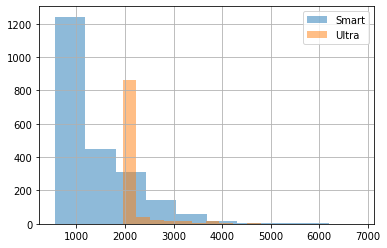

In [80]:
finall_data_smart['income'].hist(alpha=0.5, label='Smart')
finall_data_ultra['income'].hist(alpha=0.5, label='Ultra')
plt.legend()  
plt.show()

Отвергаем нулевую гипотезу, что средние выручки пользователей тарифов «Ультра» и «Смарт» равны. Значит, средняя выручка пользователя зависит от тарифа. 

## Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

Создадим тадве таблицы: пользователи из Москвы Moscow_data и пользователи из других регионов other_data.

In [81]:
Moscow_data = finall_data.query('city=="Москва"')
print(Moscow_data['income'].describe())
#Moscow_data

count     611.000000
mean     1561.220949
std       753.214496
min       550.000000
25%       831.500000
50%      1776.000000
75%      1950.000000
max      5357.000000
Name: income, dtype: float64


In [82]:
other_data = finall_data.query('city != "Москва"')
print(other_data['income'].describe())
#other_data

count    2603.000000
mean     1541.177103
std       814.534010
min       550.000000
25%       750.000000
50%      1632.000000
75%      1950.000000
max      6824.000000
Name: income, dtype: float64


Средние значения и медианы по тарифам близки, но это малоинформативно. Будем использовать сами датасеты для проведения статистического теста.

Нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства.
Cформулируем нулевую гипотезу H₀: средние выручки пользователей из Москвы и пользователей из других регионов равны.
Исходя из H₀ формулируется альтернативная гипотеза H₁: средние выручки пользователей из Москвы и пользователей из других регионов отличаются.

In [83]:
print('Дисперсия по Москве =',np.var(Moscow_data['income'], ddof=1))
print('Дисперсия по другим городам =',np.var(other_data['income'], ddof=1))

Дисперсия по Москве = 567332.0773308999
Дисперсия по другим городам = 663465.6530958369


Дисперсия выручки пользователей по Москве = 567332, дисперсия выручки пользователей по другим городам = 663466, дисперсии не сильно отличаются, следовательно параметр equal_var в методе scipy.stats.ttest_ind можно принять равным True.

In [84]:
alpha = 0.05 # критический уровень статистической значимости. Если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(Moscow_data['income'], other_data['income'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.578869733775166
Не получилось отвергнуть нулевую гипотезу


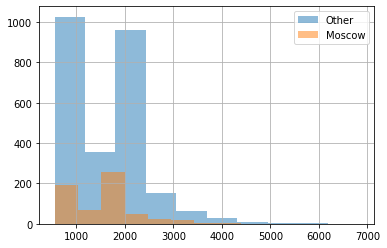

In [85]:
other_data['income'].hist(alpha=0.5, label='Other')
Moscow_data['income'].hist(alpha=0.5,label='Moscow')
plt.legend()
plt.show()

Не получилось отвергнуть нулевую гипотезу, что средние выручки пользователей из Москвы и пользователей из других регионов равны. Полученное значение p-value равно 58%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.

# Шаг 5. Общий вывод

Проведена прдобработка данных по двум тарифным планам: «Смарт» и «Ультра». У большого количества звонков длительность — 0.00 минут, также встречаются сессии с интернет-трафиком 0 мегабайт. Это проблема в данных. Заменили все нули в данных о минутах на единицы, так как если в таблице присутствует уникальный номер звонка, то звонок был и минимальная продолжительность времени, которую засчитывает оператор, равна одной минуте.Заменили все нули в данных о количестве мегабайтов на единицы, так как если в таблице присутствует уникальный номер сессии, то выход в интернет был.  
Значения минут и мегабайтов всегда округляется вверх. Данные были представлены без округления до минут и мегабайтов, поэтому округлили все значения в большую сторону.

Анализ двух тарифов показал, что пользователи тарифа «Смарт» разговаривают дольше, чаще отправляют сообщения и чаще пользуются интернетом. Была подсчитана помесячная выручка с каждого пользователя.

После проведения статистических методов, приходим к выводам:
- средняя выручка пользователя зависит от тарифа;
- значимого различии между средними выручками пользователей из Москвы и пользователей из других регионов нет.

Чтобы понять, какой тариф приносит больше денег, взглянем еще раз на даннные о средней выручки по тарифам.

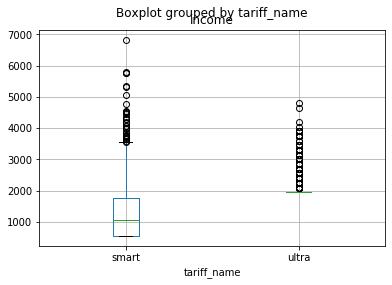

In [86]:
finall_data.boxplot('income',by='tariff_name') 
plt.show()

Средняя выручка по тарифу «Ультра» больше, чем по тарифу «Смарт». Хотя датасет выручки тарифа «Смарт» скошен вправо, все же он полностью лежит ниже датасета тарифа «Ультра», т.е. пользователи тарифа  «Смарт» в среднем платят меньше минимальной суммы тарифа «Ультра». Следовательно, коммерческому департаменту стоит увеличить рекламный бюджет тарифа «Ультра», так как он приносит компании больше выручки. 